# 目的
- semantic segmentationをやってみる
- 公式gitのexampleに従って、pretrainedモデルを動かしてみる

In [1]:
import matplotlib.pyplot as plt

import chainer   

from chainercv.datasets import camvid_label_colors
from chainercv.datasets import camvid_label_names
from chainercv.links import SegNetBasic
from chainercv import utils
from chainercv.visualizations import vis_image
from chainercv.visualizations import vis_semantic_segmentation

/home/tokita/.pyenv/versions/anaconda2-4.4.0/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
img = utils.read_image('data/0001TP_008550.png', color=True)
#img = utils.read_image('data/IMG_2821.jpeg', color=True)
print(img.shape)

(3, 360, 480)


In [3]:
# 初めて読む場合はモデルをダウンロードする
model = SegNetBasic(
    n_class=len(camvid_label_names),
    pretrained_model='camvid')

In [4]:
labels = model.predict([img])
label = labels[0]

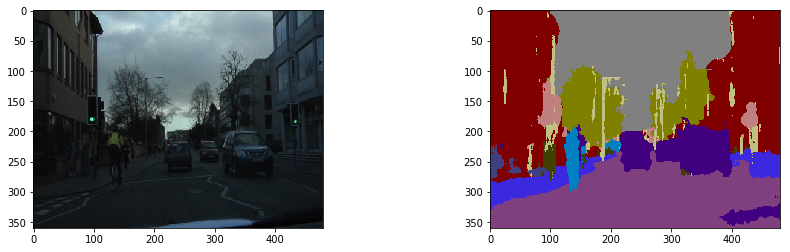

In [5]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(1, 2, 1)
vis_image(img, ax=ax1)

ax2 = fig.add_subplot(1, 2, 2)
# Do not overlay the label image on the color image
vis_semantic_segmentation(
    None, label, camvid_label_names, camvid_label_colors, ax=ax2)
plt.show()

In [8]:
label

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int32)

In [9]:
camvid_label_names

('Sky',
 'Building',
 'Pole',
 'Road',
 'Pavement',
 'Tree',
 'SignSymbol',
 'Fence',
 'Car',
 'Pedestrian',
 'Bicyclist')